In [105]:
import pandas as pd
import numpy as np
import math
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image, display  
#from omniplot  import plot as op
import matplotlib.cm as cm  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

In [106]:
shooting = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/player_premier_league_shooting.csv')

In [107]:
def sort_highest(df: pd.DataFrame,columnName: str) -> pd.DataFrame:
    df.sort_values(by = columnName, ascending=False, inplace=True)
    df.reset_index(inplace=True,drop='index')
    return df

def sort_lowest(df: pd.DataFrame,columnName: str) -> pd.DataFrame:
    df.sort_values(by = columnName,inplace=True)
    df.reset_index(inplace=True,drop='index')
    return df

def drop_columns(df: pd.DataFrame,columnNames: list()) -> pd.DataFrame:
    df.drop(columns=columnNames, inplace=True)

    return df











In [108]:

def clean_data(df: pd.DataFrame) -> pd.DataFrame:

    columns_to_drop = ['Unnamed: 0']

    shooting_df = (
        df.sort_values(by='xG', ascending=False)
        .rename(columns={'Pos':'Position'})
        .reset_index(drop=True)
        .fillna(0)
        .drop(columns=columns_to_drop)
        

    )

    return shooting_df



shooting_df = clean_data(shooting)



top10xG = shooting_df.head(10)

def nation_data(df: pd.DataFrame) -> pd.DataFrame:
    df=shooting_df.groupby('Nation').sum()


teams = shooting_df.Squad.unique()
colors = cm.get_cmap('tab20',len(teams))

team_colors = {team:colors(i) for i,team in enumerate(teams)}

shooting_df['Team_color']= shooting_df['Squad'].map(team_colors)

#plt.figure(figsize=(12, 8))  
#bars = plt.bar(shooting_new['Player'],shooting_new['Goals'], color=[team_colors[team]for team in shooting_new['Squad']])  



In [109]:
features_to_sum= ['Squad','Goals','Tot_Shot','Shot_On_Target','TotalShotPer90','Goal/TotShot','Goal/ShotTarget','Penalty','Att_Penalty','xG','NoPen_xG','NoPen_xGperShot','Goal-xG','NoPen_Goal-xG']
features_for_average = ['Squad','Age','90s_played','Shot_Target_Rate']
squad_totals=shooting[features_to_sum].groupby('Squad').sum()
#squad_totals.drop(columns=['Unnamed: 0'],inplace=True)
averages= shooting_df[features_for_average].groupby('Squad').mean()

new_df = averages.join(squad_totals, how='inner', on= 'Squad')
new_df[['Age','90s_played','Shot_Target_Rate']] = new_df[['Age','90s_played','Shot_Target_Rate']].round(2)

new_df

,Age,90s_played,Shot_Target_Rate,Goals,Tot_Shot,Shot_On_Target,TotalShotPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
Squad,,,,,,,,,,,,,,,,
Arsenal,23.96,16.07,24.88,84,589,194,33.40,3.25,8.02,3,4,73.4,70.5,2.06,10.6,10.5
Aston Villa,26.58,16.06,21.19,49,427,145,31.26,1.50,4.39,3,4,51.2,48.1,1.81,-2.2,-2.1
Bournemouth,25.26,13.48,24.93,37,358,126,25.83,1.72,4.83,0,0,39.6,39.6,2.40,-2.6,-2.6
Brentford,25.00,16.72,29.19,56,400,147,32.90,1.75,4.56,7,8,58.3,52.0,2.67,-2.3,-3.0
Brighton,23.48,14.42,23.52,68,607,219,54.76,1.78,4.48,6,6,75.6,70.8,2.74,-7.6,-8.8
Chelsea,24.66,13.03,26.02,37,481,151,41.85,1.63,5.35,3,3,50.1,47.7,2.62,-13.1,-13.7
Crystal Palace,25.65,16.03,21.23,38,423,133,24.62,1.47,3.71,1,3,39.9,37.4,2.03,-1.9,-0.4
Everton,25.43,14.90,27.05,32,426,143,33.53,1.57,4.73,3,3,46.3,44.0,2.75,-14.3,-15.0
Fulham,26.48,14.38,24.58,52,420,137,37.91,2.40,6.57,5,9,47.4,40.3,1.93,4.6,6.7


# # Most xG
With this dataset we are going to return the players in the premier league that had the highest XG over the course of the season, to be able to determine who had the most clear cut chances over the course of the season.

xG - This is terminology used within the footballing commmunity to determine the excpected pssobilty to score a specific chance, which ranges from 0-1
    `1 being it is a clear cut opportunity with 100% chance to score, all the way down to 0, which is a 0% chance of scoring a specific chance
Goals - Simply the amount of goals each player scored across the span of 2022/2023 premier league season 

Displaying below is a simple barplot that shows the players goals compared to their xG, it's comparing the players who are very effecient infront of goal, that utilize less expected goals to score

Text(0, 0.5, 'Goals vs xG')

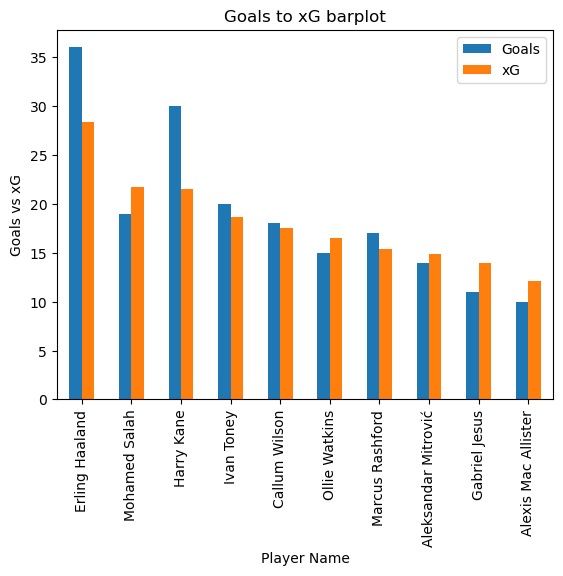

In [110]:
top10xG.reset_index().plot(
    x="Player", y=["Goals", "xG"], kind="bar"
)
plt.title("Goals to xG barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs xG")

# # Most Goals

The next visualzation in this dataset is collecting and showing the players that scored the most goals over the span of the 2022/2023 season
from the highest number of goals: "PlayerName(Goals)"
The top three most notable scorers are 
1.)Erling Haaland(36)
2.)Harry kane(30)
3.)Ivan Toney(20)


<AxesSubplot:xlabel='Goals', ylabel='Player'>

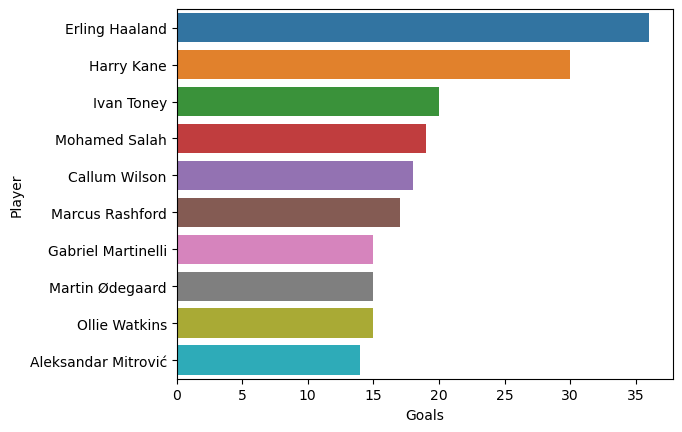

In [111]:
#Returning the top 10 highest goal scorers in the 2022/2023 season first by sorting the dataset by the amount of goals each person scored.
top10Goals = shooting_df.sort_values(by='Goals',ascending=False).head(10)
#simple barplot to show the amount of goals scored by each player 
sns.barplot(x='Goals',y='Player',data=top10Goals)

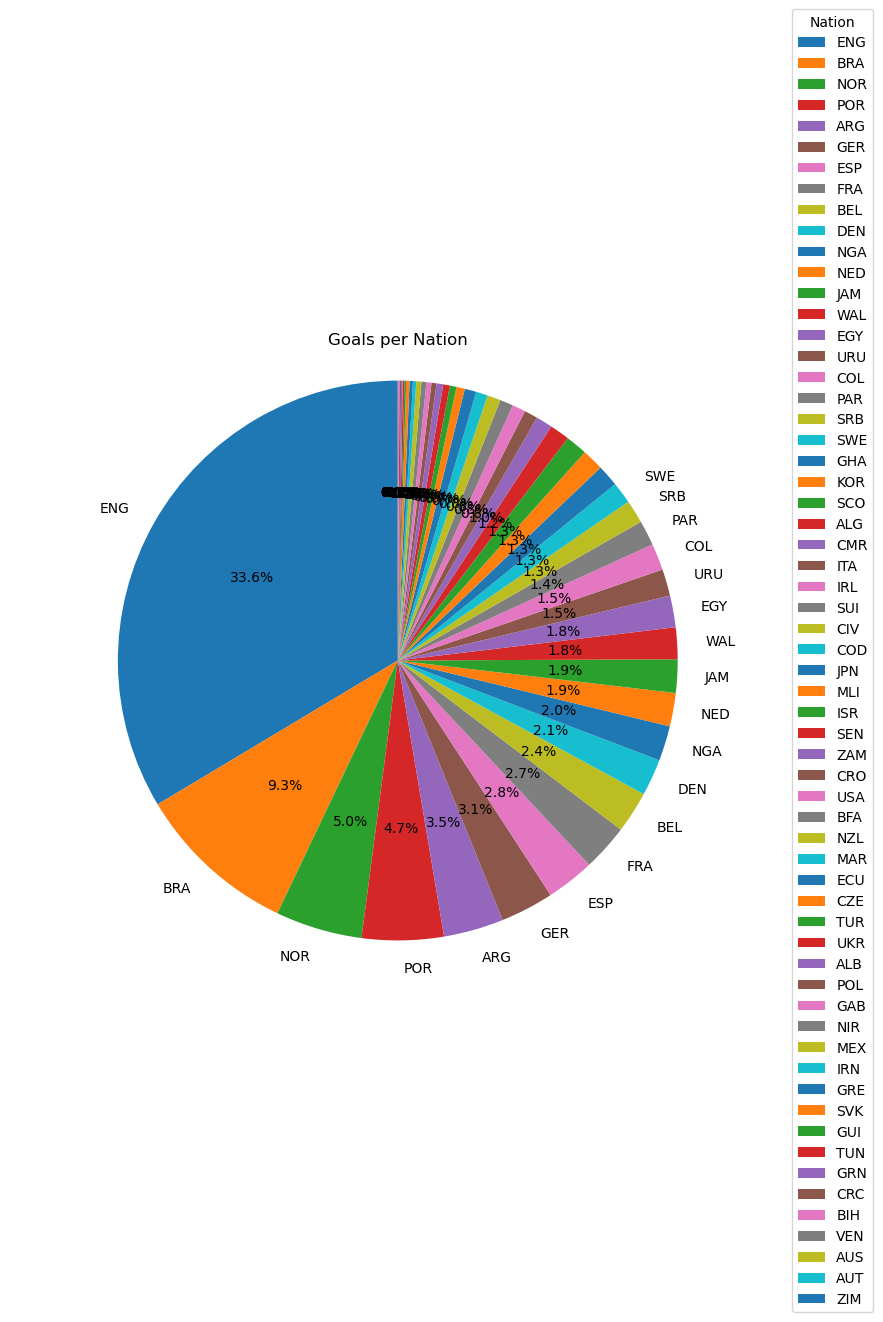

In [112]:
def GoalsperNation(df: pd.DataFrame)-> pd.DataFrame:
    df= df.groupby('Nation').sum()
    df.reset_index(inplace=True)
    df.sort_values(by='Goals',ascending=False, inplace= True)


    df.Nation =df.Nation.str.replace('[a-z\s]','', regex=True)

    
    return df[['Nation','Goals']]



nation_df=GoalsperNation(shooting_df)
nation_df.reset_index(inplace=True,drop='index')



labels = [label if index<20 else '' for index,label in enumerate(nation_df['Nation'])]


fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis objects with a specified size  
wedges, texts, autotexts = ax.pie(  
    nation_df['Goals'],  
    labels=labels,  
    autopct='%1.1f%%',  # Display percentages on the pie wedges  
    startangle=90       # Start the first wedge at 90 degrees  
)  
  
# Set the aspect ratio to 'equal' to ensure the pie chart is a circle  
ax.axis('equal')  
  
# Customize legend and its location  
ax.legend(  
    wedges, nation_df['Nation'],   
    title="Nation",  
    loc="center left",   
    bbox_to_anchor=(1, 0.5)  # Place the legend outside of the pie chart  
)  
  
# Optional: Set the title for the plot  
ax.set_title("Goals per Nation")  
  
# Display the plot  
plt.show()  




# # Most Effecient Scorers

Players with the most goals scored with the best conversion rate per shot

Very Insightful, theres a new set of players that joined the list, players with a very common similarity amongst them, mostly come from Arsenal. Three very impactful players to the new playstyle of, these players are Martinelli, Saka and Odegaard

Text(0, 0.5, 'Goals vs xG')

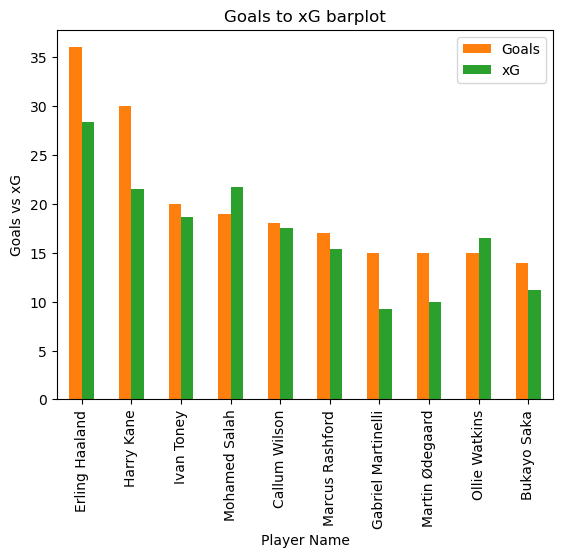

In [113]:
Most_effecient = shooting_df.sort_values(by=['Goals','Goal-xG','Shot_Target_Rate'],ascending=False)
top10eff=Most_effecient.head(10)

top10eff.reset_index().plot(
    x="Player", y=["Goals", "xG"], kind="bar", color=['#ff7f0e', '#2ca02c']
)

plt.title("Goals to xG barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs xG")




# Most Effecient Teams 

In this section of the code we would be grouping the most effecient premier league players by their teams, to return the top 25 most effecient players in the premier league and the teams they belong to in the premier league 

In [114]:
"""The top 20 players with the most effecient scoring grouped by the team they play for - Returns Arsenal as the most effecient team based of the team
with the most players amongst the top 20 list for effeciency 
 """
top20eff = Most_effecient.head(25)
mosteffecientTeam= top20eff.groupby('Squad').count()

mosteffecientTeam.rename(columns= {'Player':'Count'},inplace=True)
mosteffecientTeam.reset_index(inplace=True)
sort_highest(mosteffecientTeam[['Squad','Count']],'Count')

,Squad,Count
0,Arsenal,4
1,Newcastle Utd,3
2,Brighton,2
3,Leicester City,2
4,Liverpool,2
5,Manchester City,2
6,Tottenham,2
7,Aston Villa,1
8,Brentford,1
9,Crystal Palace,1


# Goal Correlation 

As we all know the most important aspect of being a greater scorer is the amount of goals you score, so in this correlation plots provided below we would be reviewing the features in a premier league game that lead to higher amount of goals. Some of these features we would be plotting correlation to the amount of goals a player scores are:

Shot_on_target - The amount of shots that player took that were on target for scoring 
xG - The amount of expected goals that player had accross the span of the premier league season 
Penalty - The amount of penalties that player scored, accross the span of the premier league season 
Tot_shot - The amount of shots each player took accross the span of the season irregardless of whether it was on target or not
Non_penxG - This is the amount of expected goals each player accumulated without taking into account the xG for penalties
Att-Penalty - The amount of touches that player took inside the opposing teams penalty area

Results
Unsurprisingly, each of the features resulted in a higher correlation in the amount of goals scored in the 2023/2024 season 




<AxesSubplot:>

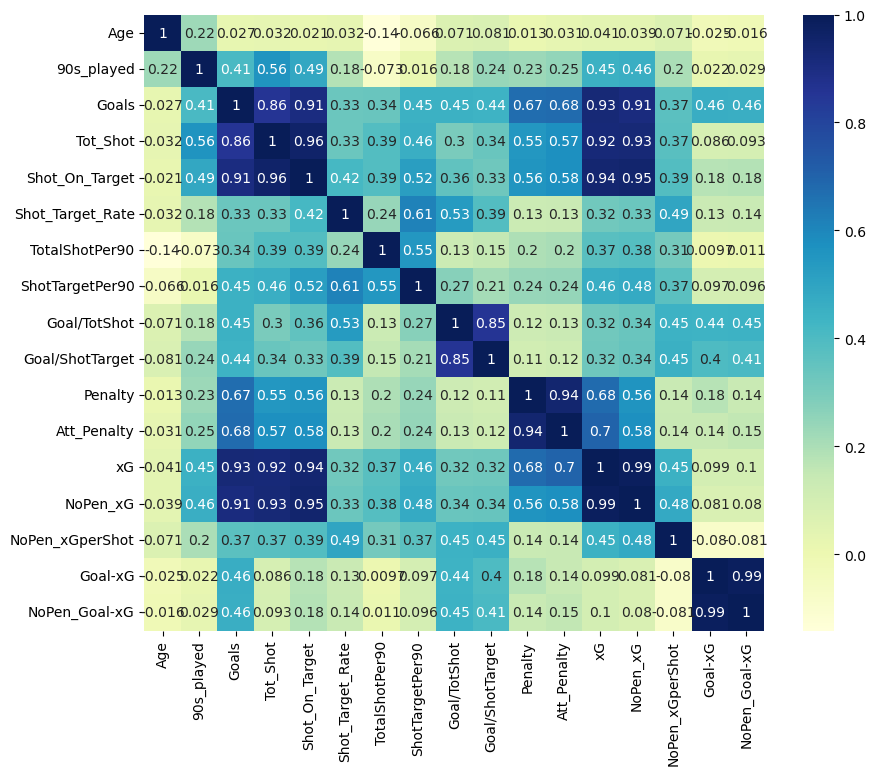

In [115]:
#plot correlation against the other numeric values provided in the dataframe
dataFramecorr = shooting_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(dataFramecorr, cmap = 'YlGnBu', annot = True)

Breaking Down the heatmap correlation into smaller categries using the data within the dataset that has a higher correlation towards the amount of goals scored for each player

<AxesSubplot:>

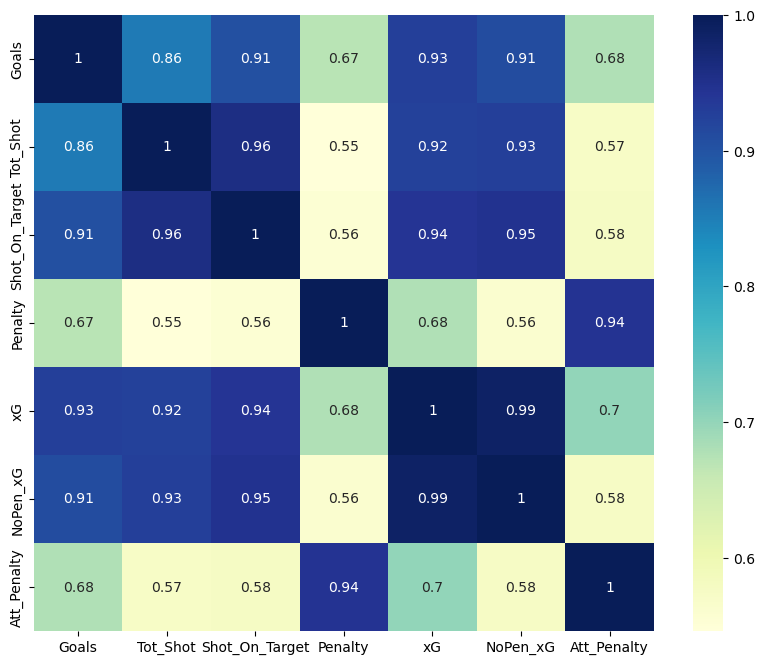

In [116]:
#as we determine who had the most amount of goals during the season 
featureData = shooting_df[['Goals','Tot_Shot','Shot_On_Target','Penalty','xG','NoPen_xG','Att_Penalty']]


shot_correlation=featureData.corr()
plt.figure(figsize=(10,8))
sns.heatmap(shot_correlation,cmap="YlGnBu",annot=True)



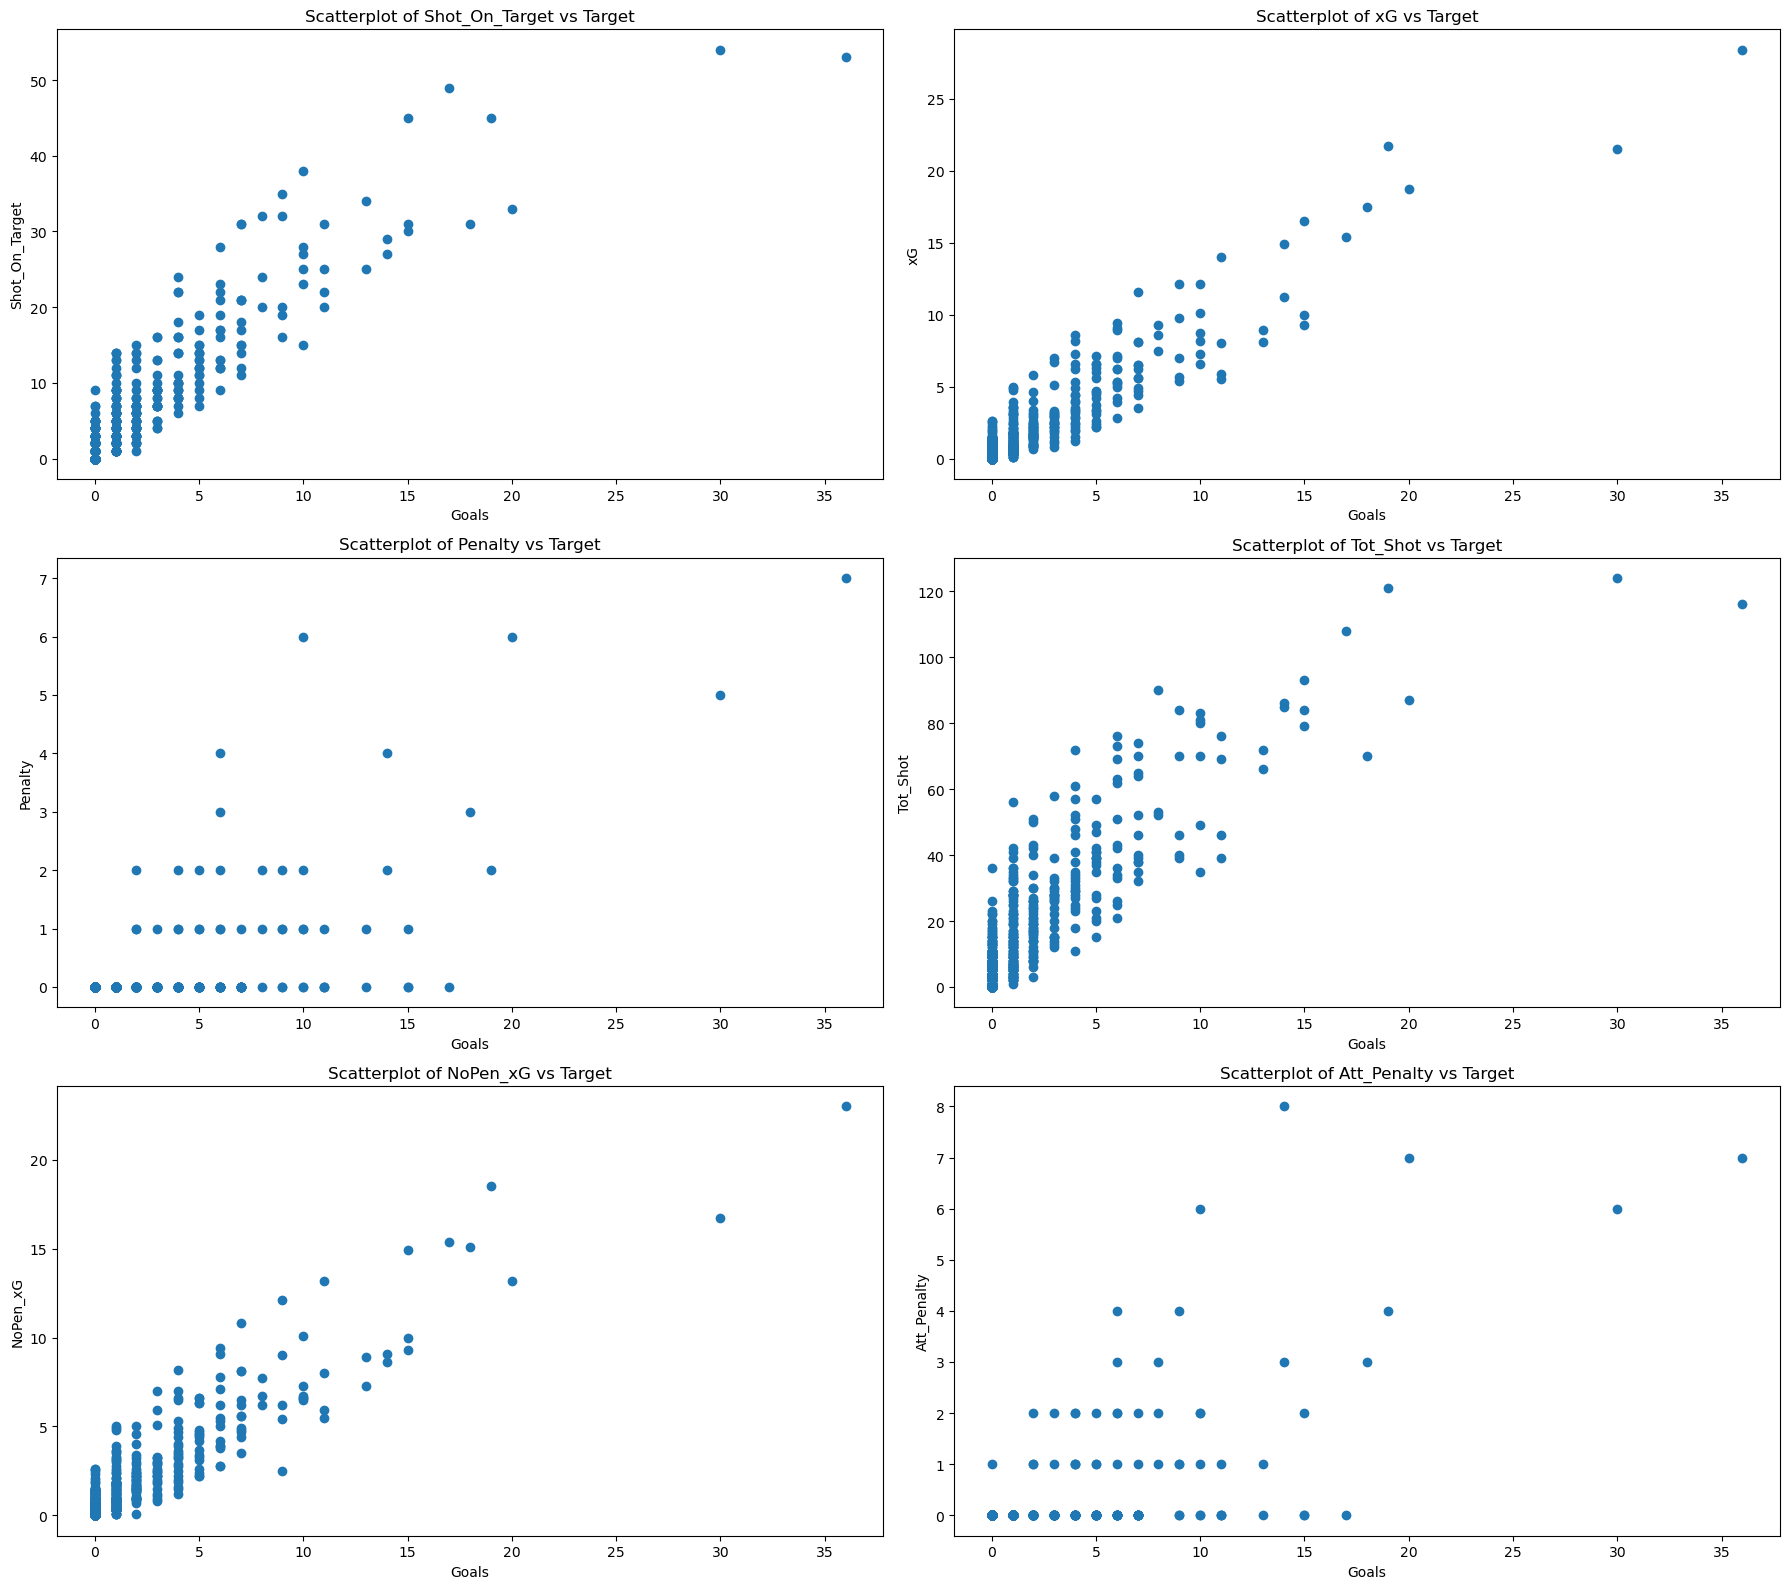

In [117]:

features = ['Shot_On_Target','xG', 'Penalty', 'Tot_Shot','NoPen_xG','Att_Penalty']


num_features = len(features)
num_columns = 2  # For example, 2 columns  
num_rows = np.ceil(num_features / num_columns).astype(int)  # Calculate the required number of rows 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(6*3,4*4))

axes=axes.flatten()

if num_features == 1:
    axes= [axes]

for i, feature in enumerate(features):  
    axes[i].scatter(shooting_df['Goals'], shooting_df[feature])  
    axes[i].set_xlabel('Goals')  
    axes[i].set_ylabel(feature)  
    axes[i].set_title(f'Scatterplot of {feature} vs Target')  
  
# Adjust layout for better fit  
plt.tight_layout()  
plt.show()  



# # Highest scoring Defender

#  Who doesn't love a player that can score aswell as defend?! Well I do!!

In this section, we will be returning the highest scoring defenders accross the 2023/2024 season.


<AxesSubplot:xlabel='Goals', ylabel='Player'>

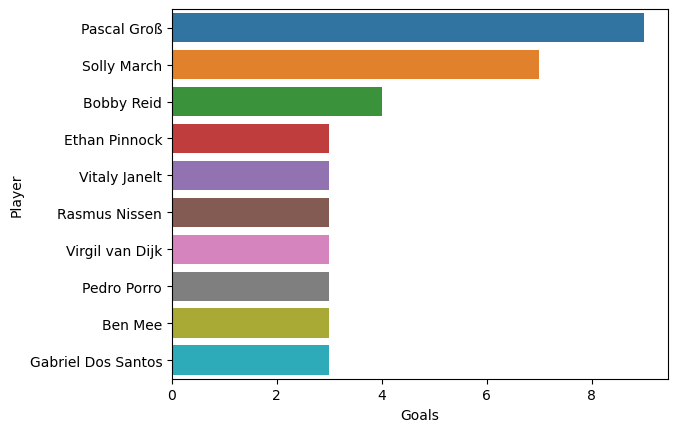

In [118]:
#Filtering the dataframe for Defenders 
defender_shooting = shooting_df[shooting_df['Position'].str.contains('DF')]
# Sort the dataframe by 'Goals' in descending order  
sort_highest(defender_shooting,'Goals')

# Reset the index of the dataframe  
defender_shooting.reset_index(inplace=True,drop='index')

# Standardize the position notation 
defender_shooting.Position= defender_shooting.Position.str.replace('MF,DF','DF,MF')
defender_shooting.Position= defender_shooting.Position.str.replace('FW,DF','DF,FW')




sns.barplot(x='Goals',y='Player',data=defender_shooting.head(10))




In [119]:
grouped_def = defender_shooting.groupby('Squad').sum()
grouped_def.reset_index(inplace=True)



grouped_mid= grouped_def[['Squad','Goals','Tot_Shot','Shot_On_Target','Penalty','xG','NoPen_xG','Att_Penalty']]

sort_highest(grouped_mid,'Goals')

,Squad,Goals,Tot_Shot,Shot_On_Target,Penalty,xG,NoPen_xG,Att_Penalty
0,Brighton,19,212,64,0,22.7,22.7,0
1,Tottenham,14,166,45,0,14.8,14.8,0
2,Arsenal,10,92,26,0,9.6,9.6,0
3,Brentford,10,104,29,0,12.2,12.2,0
4,Leeds United,9,97,26,0,9.4,9.4,0
5,Chelsea,8,134,34,0,11.8,11.8,0
6,Fulham,8,72,23,0,6.3,6.3,0
7,Everton,6,102,28,0,11.1,11.1,0
8,Liverpool,6,120,30,0,9.4,9.4,0
9,Manchester City,5,89,16,0,7.5,7.5,0


<AxesSubplot:>

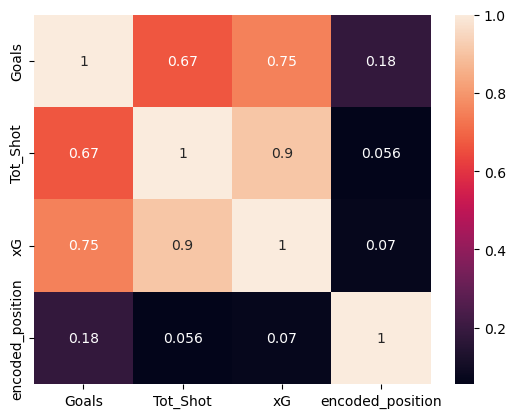

In [120]:


from sklearn.preprocessing import LabelEncoder

le_position = LabelEncoder()

defender_shooting['encoded_position'] = le_position.fit_transform(defender_shooting['Position'])

correlation_features= defender_shooting[['Position','Goals','Tot_Shot','xG','encoded_position']]

correlation_pos= correlation_features.corr()

sns.heatmap(correlation_pos,annot=True)


# Scoring Midfielders

These are the players in the premier league that play in the midfield role. As we know the midfield role is the orchestrator of the team, traditionally the players that played in this position were know for mostly passing and creating chances for other team members, moving on the the 21st century, with notable names such as: Lampard, Yaya Toure, Bruno Fernandes, Cristiano Ronaldo while he played for manchester united and Matt Letissier. This position has almost become the backbone of all goal contributions during the season, so here we would be looking at the players that played as a midfielder during the season and contributed to the most scoring


In [121]:
midfielder_shooting = shooting_df[shooting_df['Position'].str.contains('MF')]



defender_shooting.Position= defender_shooting.Position.str.replace('FW,MF','MF,FW')
defender_shooting.Position= defender_shooting.Position.str.replace('FW,MF','MF,FW')


highest_scoringMID=sort_highest(midfielder_shooting,'Goals')
grouped_mid = highest_scoringMID.groupby('Squad').sum()
grouped_mid.reset_index(inplace=True)



grouped_mid= grouped_mid[['Squad','Goals','Tot_Shot','Shot_On_Target','Penalty','xG','NoPen_xG','Att_Penalty']]

sort_highest(grouped_mid,'Goals')





highest_scoringMID


,Player,Nation,Position,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG,Team_color
0,Martin Ødegaard,no NOR,MF,Arsenal,23,34.7,15,93,31,33.3,...,0.16,0.48,0,0,10.0,10.0,0.11,5.0,5.0,"(0.5803921568627451, 0.403921568627451, 0.7411..."
1,Rodrigo,es ESP,"FW,MF",Leeds United,31,21.5,13,66,25,37.9,...,0.18,0.48,1,1,8.1,7.3,0.11,4.9,4.7,"(0.4980392156862745, 0.4980392156862745, 0.498..."
2,Harvey Barnes,eng ENG,"FW,MF",Leicester City,24,30.1,13,72,34,47.2,...,0.18,0.38,0,0,8.9,8.9,0.12,4.1,4.1,"(0.9686274509803922, 0.7137254901960784, 0.823..."
3,Roberto Firmino,br BRA,"FW,MF",Liverpool,30,13.5,11,39,25,64.1,...,0.28,0.44,0,0,5.5,5.5,0.14,5.5,5.5,"(0.6823529411764706, 0.7803921568627451, 0.909..."
4,Alexis Mac Allister,ar ARG,MF,Brighton,23,32.1,10,80,28,35.0,...,0.05,0.14,6,6,12.1,7.3,0.09,-2.1,-3.3,"(0.7725490196078432, 0.6901960784313725, 0.835..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Remo Freuler,ch SUI,MF,Nott'ham Forest,30,24.0,0,8,1,12.5,...,0.00,0.00,0,0,0.4,0.4,0.05,-0.4,-0.4,"(0.7803921568627451, 0.7803921568627451, 0.780..."
255,Sergio Gómez,es ESP,"DF,MF",Manchester City,21,3.9,0,7,0,0.0,...,0.00,0.00,0,0,0.4,0.4,0.05,-0.4,-0.4,"(0.12156862745098039, 0.4666666666666667, 0.70..."
256,Thiago Alcántara,es ESP,MF,Liverpool,31,13.9,0,10,1,10.0,...,0.00,0.00,0,0,0.4,0.4,0.05,-0.4,-0.4,"(0.6823529411764706, 0.7803921568627451, 0.909..."
257,James Milner,eng ENG,"MF,DF",Liverpool,36,10.1,0,7,1,14.3,...,0.00,0.00,0,0,0.4,0.4,0.06,-0.4,-0.4,"(0.6823529411764706, 0.7803921568627451, 0.909..."


Text(0.5, 1.0, 'Highest Scoring Midfielders')

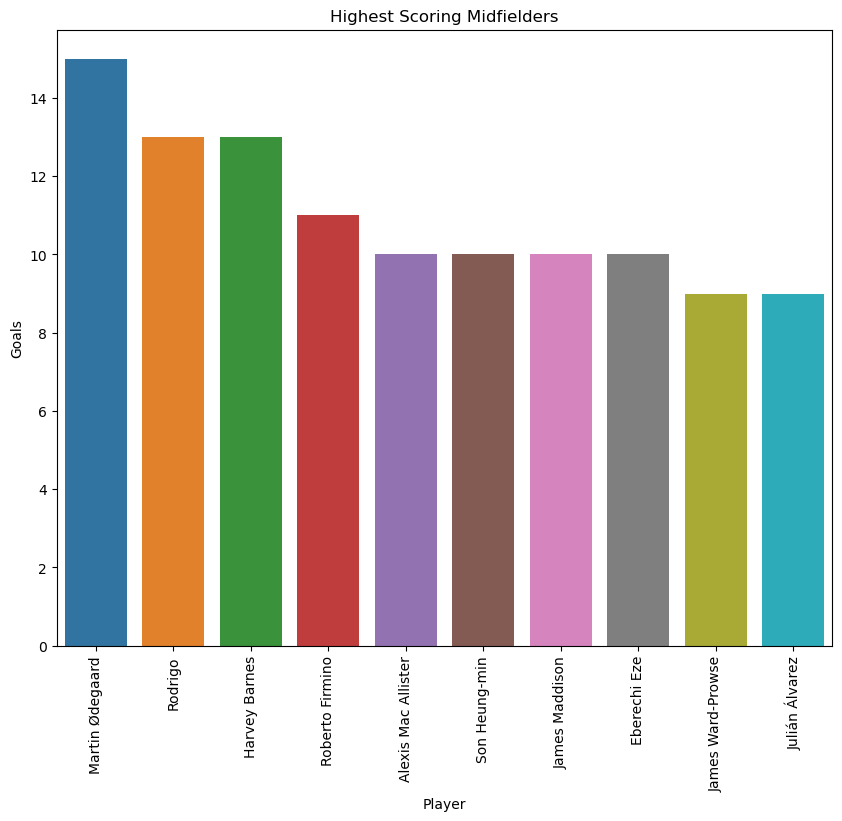

In [122]:
plt.figure(figsize=(10,8))
sns.barplot(x='Player',y='Goals',data=highest_scoringMID.head(10))
plt.xticks(rotation=90) 
plt.title('Highest Scoring Midfielders')




# Scoring Attackers


In [123]:
attackers_shooting = shooting_df[shooting_df['Position'].str.contains('FW')]



attackers_shooting.Position= attackers_shooting.Position.str.replace('MF,FW','FW,MF').replace('DF,FW','FW,DF')
#attackers_shooting.Position= attackers_shooting.Position.str.replace('DF,FW','FW,DF')


attackers_scoring=sort_highest(attackers_shooting,'Goals')
grouped_att= attackers_scoring.groupby('Squad').sum()
grouped_att.reset_index(inplace=True)



grouped_att= grouped_att[['Squad','Goals','Tot_Shot','Shot_On_Target','Penalty','xG','NoPen_xG','Att_Penalty']]

attackers_scoring


,Player,Nation,Position,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG,Team_color
0,Erling Haaland,no NOR,FW,Manchester City,22,30.8,36,116,53,45.7,...,0.25,0.55,7,7,28.4,23.0,0.20,7.6,6.0,"(0.12156862745098039, 0.4666666666666667, 0.70..."
1,Harry Kane,eng ENG,FW,Tottenham,29,37.8,30,124,54,43.5,...,0.20,0.46,5,6,21.5,16.7,0.13,8.5,8.3,"(1.0, 0.4980392156862745, 0.054901960784313725..."
2,Ivan Toney,eng ENG,FW,Brentford,26,32.8,20,87,33,37.9,...,0.16,0.42,6,7,18.7,13.2,0.15,1.3,0.8,"(1.0, 0.7333333333333333, 0.47058823529411764,..."
3,Mohamed Salah,eg EGY,FW,Liverpool,30,36.6,19,121,45,37.2,...,0.14,0.38,2,4,21.7,18.5,0.15,-2.7,-1.5,"(0.6823529411764706, 0.7803921568627451, 0.909..."
4,Callum Wilson,eng ENG,FW,Newcastle Utd,30,20.9,18,70,31,44.3,...,0.21,0.48,3,3,17.5,15.1,0.22,0.5,-0.1,"(0.17254901960784313, 0.6274509803921569, 0.17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Emile Smith Rowe,eng ENG,"FW,MF",Arsenal,22,1.9,0,4,1,25.0,...,0.00,0.00,0,0,0.3,0.3,0.07,-0.3,-0.3,"(0.5803921568627451, 0.403921568627451, 0.7411..."
208,Daniel James,wls WAL,FW,Leeds United,24,2.2,0,3,1,33.3,...,0.00,0.00,0,0,0.3,0.3,0.09,-0.3,-0.3,"(0.4980392156862745, 0.4980392156862745, 0.498..."
209,David Brooks,wls WAL,"FW,MF",Bournemouth,25,1.9,0,5,1,20.0,...,0.00,0.00,0,0,0.3,0.3,0.05,-0.3,-0.3,"(0.7686274509803922, 0.611764705882353, 0.5803..."
210,Jay Stansfield,eng ENG,FW,Fulham,19,1.0,0,2,0,0.0,...,0.00,0.00,0,0,0.3,0.3,0.13,-0.3,-0.3,"(1.0, 0.596078431372549, 0.5882352941176471, 1.0)"


In [124]:
mid_att_df = attackers_scoring.append(highest_scoringMID)

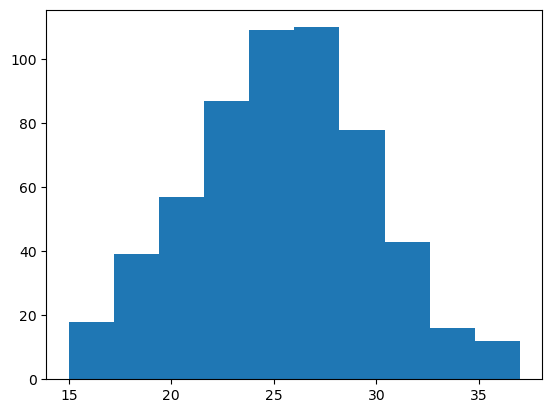

In [125]:
Age_group=shooting_df.groupby(by='Age')['Goals'].sum().reset_index()
Age_group.rename(columns={'Goals':'Total Goals'},inplace=True)
age_dist = plt.hist(shooting_df['Age'])                         

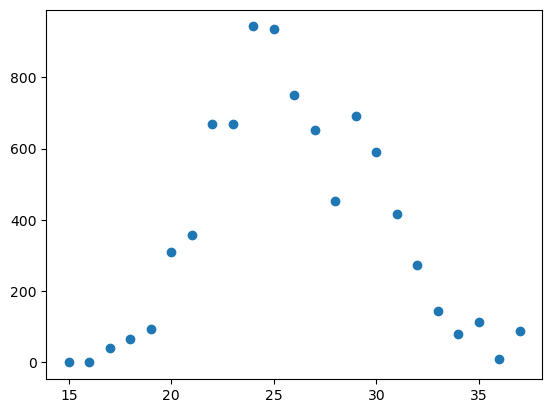

In [126]:

FullGames_group=shooting_df.groupby(by='Age')['90s_played'].sum().reset_index()
FullGames_group.rename(columns={'90s_played':'Total_90s'},inplace=True)
plt.scatter(x='Age',y='Total_90s',data=FullGames_group)

In [127]:
"""res=op.scatterplot(shooting_df, 
               x="Goals",
               y="xG", 
               category=['Squad'],
                marginal_dist=True,
                kde=True,
                regression=True,
                save="shooting.png")"""

'res=op.scatterplot(shooting_df, \n               x="Goals",\n               y="xG", \n               category=[\'Squad\'],\n                marginal_dist=True,\n                kde=True,\n                regression=True,\n                save="shooting.png")'

# MACHINE LEARNING!!!!!!!!!
## Predicting players Goals Using Machine Learning models

**Objective**
In this section of the project we aim to predict the amount of goals a player scored over the course of the 2022/2023 season, using a Linear Regression Model. A linear regression model is a statistical concept aimed at predicting numerical value, utilizing the relationship of a single dependent variable, versus one or more independent variables. In the case of this project we are looking to predict the amount of goals a player scored with variables such as the Total Shots, Shots On Target, xG and NonPen_xG

### Approach
**Data Preparation**:   
   - **Feature Selection**: This is the process of Identify and selecting the relevant features that can influence the number of goals scored by a player. Common features might include shots on target, Att_penalty Touches, Penalties, total shots, etc.
   - **Data Cleaning**: Handle any missing values, outliers, and ensure that the data is in a suitable format for modeling.  
   - **Data Splitting**: Split the dataset into training and test sets to evaluate the performance of the model. 

2. **Model Training**:  
   - **Linear Regression**: Use the training set to train a linear regression model. This involves fitting a line that best represents the relationship between the features and the target variable (goals).  
   - **Model Evaluation**: Evaluate the model's performance on the test set using metrics such as Mean Squared Error (MSE), R-squared, etc.  
  
3. **Prediction**:  
   - Use the trained model to predict the number of goals for players in the test set and compare the predicted values with the actual values.  
  
### Implementation  
The following Python code demonstrates how to implement the linear regression model for predicting players Goals for future premier league seasons



In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
reg = LinearRegression()

x=shooting_df[['Tot_Shot','Shot_On_Target','xG','NoPen_xG']]
y=shooting_df['Goals']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

reg.fit(X_train,y_train)

print(reg.score(X_test,y_test))

y_preds = reg.predict(X_test)  

shots_on_target = X_test['Shot_On_Target']
tot_shots =  X_test['Tot_Shot']
xG = X_test['xG']
NonPen_xG = X_test['NoPen_xG']
  
# Print the predictions and the actual values  
print("Predictions vs Actual Values:")  

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted':y_preds,
    'Shot_on_target':shots_on_target,
    'tot_shots':tot_shots,
    'xG':xG,
    'NonPen_xG':NonPen_xG

})

results_df = results_df.reset_index(drop=True)  

results_df.sort_values(by= 'Predicted',inplace=True, ascending=False)
results_df.reset_index(drop=True).head(10)





0.9095643925060246
Predictions vs Actual Values:


,Actual,Predicted,Shot_on_target,tot_shots,xG,NonPen_xG
0,36,27.309326,53,116,28.4,23.0
1,17,16.828248,49,108,15.4,15.4
2,11,12.910215,31,76,14.0,13.2
3,10,12.229647,38,81,10.1,10.1
4,13,10.889610,34,72,8.9,8.9
5,8,10.183036,24,52,8.6,6.2
6,10,9.536306,27,83,8.7,6.6
7,4,7.660874,22,57,6.2,4.7
8,8,7.526746,20,53,7.5,6.7
9,4,6.254474,14,41,8.2,8.2


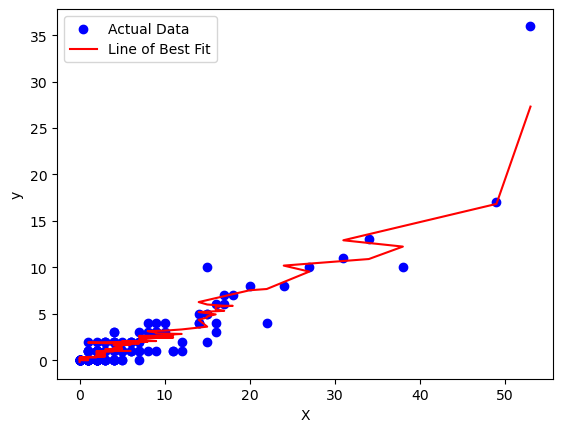

In [129]:
plt.scatter(results_df['Shot_on_target'], results_df['Actual'], color='blue', label='Actual Data')  
plt.plot(results_df['Shot_on_target'], results_df['Predicted'], color='red', label='Line of Best Fit')  
plt.xlabel('X')  
plt.ylabel('y')  
plt.legend()  
plt.show()  

In [130]:
test_dataset = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/test.csv')
test_features = ['Tot_Shot','Shot_On_Target','xG','NonPen_xG']

new_list = []
for i in range(len(test_dataset)):
    new_list.append(reg.predict([test_dataset[test_features].iloc[i]]).astype(float).round(2))

predicted_goals = [float(item) for array in new_list for item in array] 
test_dataset['Predicted_Goals'] = predicted_goals


test_dataset.sort_values(by='Predicted_Goals',inplace=True,ascending=False, ignore_index=True)


test_dataset


,Name,Tot_Shot,Shot_On_Target,xG,NonPen_xG,Goals,Team,Age,Goal-xG,NoPen_Goal-xG,NonPen_Goal,Predicted_Goals
0,Erling Haaland,121,59,29.3,22.6,27,Manchester City,23,-2.3,-9.3,20,29.99
1,Mohammed Salah,114,56,21.2,15.0,18,Liverpool,31,-3.2,-8.2,13,25.06
2,Jamie Vardy,89,43,22.3,17.0,23,Leicester City,31,0.7,-3.3,19,22.53
3,Alexander Isak,78,43,20.3,15.0,21,NewCastle United,24,0.7,-4.3,16,22.00
4,Cole Palmer,108,46,18.2,10.9,22,Chelsea,22,3.8,-6.2,12,21.62
5,Kun Aguero,94,42,16.2,13.1,21,Manchester City,29,4.8,0.8,17,17.67
6,Cristiano Ronaldo,110,43,17.7,15.4,18,Manchester United,36,0.3,-2.7,15,17.54
7,Nicolas Jackson,80,41,18.6,18.6,14,Chelsea,22,-4.6,-4.6,14,17.43
8,Dominic Solanke,109,38,19.6,17.3,19,Bournemouth,26,-0.6,-2.6,17,17.13
9,Darwin Nunez,108,46,16.4,15.6,11,Liverpool,24,-5.4,-5.4,11,16.95


In [131]:
mse = mean_squared_error(test_dataset['Goals'], test_dataset['Predicted_Goals'])
rmse = mean_squared_error(test_dataset['Goals'], test_dataset['Predicted_Goals'],squared=False)
mae = mean_absolute_error(test_dataset['Goals'], test_dataset['Predicted_Goals'])

r2 = r2_score(test_dataset['Goals'], test_dataset['Predicted_Goals'])


print(f'MSE: {mse}')  
print(f'RMSE: {rmse}')  
print(f'MAE: {mae}')  
print(f'R-squared: {r2}')  

MSE: 10.553632142857143
RMSE: 3.2486354278153686
MAE: 2.6732142857142853
R-squared: 0.45690531014112234


Feature Selection (SFS) and conclude which set of features performed better:

## Comparing Hand-Picked Features with Sequential Feature Selection  
  
### Objective  
In this section, we aim to compare the performance of a linear regression model using two different sets of features:  
1. Hand-Picked Features: Features chosen based on domain knowledge and intuition.  
2. Sequential Feature Selection (SFS): Features selected using an automated feature selection method that aims to find the most predictive subset of features.  
  
### Approach  
1. **Hand-Picked Features**:  
   - Train a linear regression model using the hand-picked features.  
   - Evaluate the performance of the model on the test set.  
  
2. **Sequential Feature Selection (SFS)**:  
   - Use Sequential Feature Selection to automatically select a subset of features.  
   - Train a linear regression model using the selected features.  
   - Evaluate the performance of the model on the test set.  
  
3. **Comparison**:  
   - Compare the performance metrics (e.g., Mean Squared Error, R-squared) of both models.  
   - Conclude which set of features performed better in predicting the number of goals. 


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
feat = []
for column in shooting_df.columns:
    if pd.api.types.is_numeric_dtype(shooting_df[column]) and column !='Goals':
        feat.append(column)

X_to_select = shooting_df[feat]
y_to_predict = shooting_df['Goals']

regressor = LinearRegression()

from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(regressor,
                                k_features=5,
                                forward=True,
                                scoring='neg_mean_squared_error',
                                )

selected_features = sfs.fit(X_to_select, y_to_predict)

sfselected = list(selected_features.k_feature_names_)

xsfs = shooting_df[sfselected]
ysfs = shooting_df.Goals

X_trains,X_tests,y_trains,y_tests = train_test_split(xsfs, ysfs, test_size=0.4,random_state=30)

regressor.fit(X_trains,y_trains)

print(regressor.score(X_tests,y_tests))

print(sfselected)


y_pred = regressor.predict(X_tests)  
  
# Print the predictions and the actual values  
print("Predictions vs Actual Values:")  

results_df = pd.DataFrame({
    'Actual': y_tests,
    'Predicted':y_pred
})

results_df = results_df.reset_index(drop=True)  

results_df.sort_values(by= 'Predicted',inplace=True, ascending=False)
results_df.head(10)





1.0
['Age', 'Tot_Shot', 'xG', 'Goal-xG', 'NoPen_Goal-xG']
Predictions vs Actual Values:


,Actual,Predicted
40,36,36.0
173,20,20.0
153,17,17.0
48,13,13.0
120,11,11.0
131,10,10.0
227,10,10.0
47,10,10.0
93,10,10.0
203,9,9.0


In [133]:
tests_dataset = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/test.csv')
test_features = ['Age', 'Tot_Shot', 'xG', 'Goal-xG', 'NoPen_Goal-xG']

new_list = []
for i in range(len(tests_dataset)):
    new_list.append(regressor.predict([tests_dataset[test_features].iloc[i]]).astype(float).round(2))

predicted_goals = [float(item) for array in new_list for item in array] 
tests_dataset['Predicted_Goals'] = predicted_goals


tests_dataset.sort_values(by='Predicted_Goals',inplace=True,ascending=False, ignore_index=True)


tests_dataset


tests_dataset

,Name,Tot_Shot,Shot_On_Target,xG,NonPen_xG,Goals,Team,Age,Goal-xG,NoPen_Goal-xG,NonPen_Goal,Predicted_Goals
0,Erling Haaland,121,59,29.3,22.6,27,Manchester City,23,-2.3,-9.3,20,27.0
1,Jamie Vardy,89,43,22.3,17.0,23,Leicester City,31,0.7,-3.3,19,23.0
2,Cole Palmer,108,46,18.2,10.9,22,Chelsea,22,3.8,-6.2,12,22.0
3,Kun Aguero,94,42,16.2,13.1,21,Manchester City,29,4.8,0.8,17,21.0
4,Alexander Isak,78,43,20.3,15.0,21,NewCastle United,24,0.7,-4.3,16,21.0
5,Dominic Solanke,109,38,19.6,17.3,19,Bournemouth,26,-0.6,-2.6,17,19.0
6,Ollie Watkins,106,46,16.9,16.9,19,Aston Villa,28,2.1,2.1,19,19.0
7,Phil Foden,105,48,10.3,10.3,19,Manchester City,23,8.7,8.7,19,19.0
8,Cristiano Ronaldo,110,43,17.7,15.4,18,Manchester United,36,0.3,-2.7,15,18.0
9,Mohammed Salah,114,56,21.2,15.0,18,Liverpool,31,-3.2,-8.2,13,18.0


Text(0, 0.5, 'Goals vs Predicted_goals')

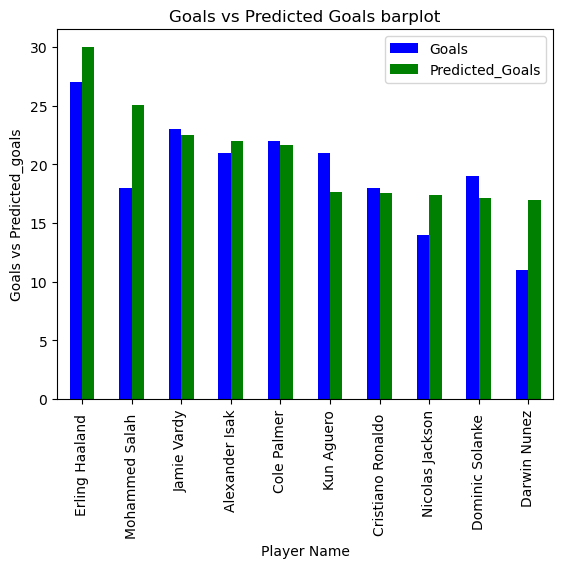

In [134]:

test_dataset.head(10).plot(
    x="Name ", y=["Goals", "Predicted_Goals"], kind="bar", color=['b', 'g']
)

plt.title("Goals vs Predicted Goals barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs Predicted_goals")


In [135]:
from sklearn.model_selection import cross_val_score

linear_score = cross_val_score(reg, X_train, y_train, cv=4)
np.average(linear_score)

linear_score





array([0.86969388, 0.86568037, 0.85340239, 0.76022954])

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

X=shooting_df[['Age', 'Tot_Shot', 'xG', 'Goal-xG', 'NoPen_Goal-xG']]
y=shooting_df['Goals']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model = DecisionTreeRegressor(max_leaf_nodes=80)

model.fit(X_train,y_train)

#print(model.predict([[110,43,17.42,14]]))



print(model.score(X_test,y_test))



0.9504327693546124


In [152]:
original_dataset = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/test.csv')
original_dataset

new_list = []
for i in range(len(test_dataset)):
    new_list.append(model.predict([original_dataset[test_features].iloc[i]]).astype(float).round(2))

predicted_goals = [float(item) for array in new_list for item in array] 
original_dataset['Predicted_Goals'] = predicted_goals

original_dataset





,Name,Tot_Shot,Shot_On_Target,xG,NonPen_xG,Goals,Team,Age,Goal-xG,NoPen_Goal-xG,NonPen_Goal,Predicted_Goals
0,Cristiano Ronaldo,110,43,17.7,15.4,18,Manchester United,36,0.3,-2.7,15,20.0
1,Kun Aguero,94,42,16.2,13.1,21,Manchester City,29,4.8,0.8,17,17.0
2,Erling Haaland,121,59,29.3,22.6,27,Manchester City,23,-2.3,-9.3,20,20.0
3,Cole Palmer,108,46,18.2,10.9,22,Chelsea,22,3.8,-6.2,12,20.0
4,Alexander Isak,78,43,20.3,15.0,21,NewCastle United,24,0.7,-4.3,16,20.0
5,Dominic Solanke,109,38,19.6,17.3,19,Bournemouth,26,-0.6,-2.6,17,20.0
6,Ollie Watkins,106,46,16.9,16.9,19,Aston Villa,28,2.1,2.1,19,17.0
7,Phil Foden,105,48,10.3,10.3,19,Manchester City,23,8.7,8.7,19,15.0
8,Mohammed Salah,114,56,21.2,15.0,18,Liverpool,31,-3.2,-8.2,13,20.0
9,Son Heung Min,85,40,12.1,10.5,17,Tottenham,31,4.9,2.9,15,14.0


In [150]:
x3_test = original_dataset[['Age', 'Tot_Shot', 'xG', 'Goal-xG', 'NoPen_Goal-xG']]
Y3_test = original_dataset.Goals

model.score(x3_test,Y3_test)

mse = mean_squared_error(original_dataset['Goals'], original_dataset['Predicted_Goals'])
rmse = mean_squared_error(original_dataset['Goals'], original_dataset['Predicted_Goals'],squared=False)
mae = mean_absolute_error(original_dataset['Goals'], original_dataset['Predicted_Goals'])

r2 = r2_score(original_dataset['Goals'], original_dataset['Predicted_Goals'])

print(f'MSE: {mse}')  
print(f'RMSE: {rmse}')  
print(f'MAE: {mae}')  
print(f'R-squared: {r2}') 


MSE: 10.75
RMSE: 3.278719262151
MAE: 2.75
R-squared: 0.4468001312766656


In [153]:
DecisionTreeRegressor_score = cross_val_score(model, X_train, y_train, cv=4)
np.average(DecisionTreeRegressor_score)

DecisionTreeRegressor_score


array([0.89497694, 0.88115988, 0.87195595, 0.82257092])